In [1]:
import matplotlib.pyplot as plt
import numpy as np
n = 6
color = plt.cm.coolwarm(np.linspace(0.1,0.9,n)) # This returns RGBA; convert:
hexcolor = map(lambda rgb:'#%02x%02x%02x' % (rgb[0]*255,rgb[1]*255,rgb[2]*255),
               tuple(color[:,0:-1]))
hexcolor

In [2]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 
hexcolor = map(lambda rgb:'#%02x%02x%02x' % (rgb[0]*255,rgb[1]*255,rgb[2]*255),
               tuple(tableau20))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import http.client
from urllib.parse import urlencode, quote
import time
import datetime
from hashlib import sha1
#from mpl_toolkits.basemap import Basemap
import random
import string
import os
import sys
import urllib as ul
import json
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from IPython.core.display import display, HTML, Image
Image(url='https://bcdn.se/images/resources/booli_logo.png')

In [4]:
# Load the dataframe
%store -r df_g
df_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13214 entries, 2071237 to 2012738
Data columns (total 29 columns):
additionalArea         13214 non-null float64
apartmentNumber        6856 non-null object
booliId                13214 non-null int64
constructionYear       12894 non-null float64
floor                  12092 non-null float64
isNewConstruction      13214 non-null float64
listPrice              13112 non-null float64
livingArea             13198 non-null float64
location               13214 non-null object
objectType             13214 non-null object
published              13214 non-null object
rent                   13176 non-null float64
rooms                  13207 non-null float64
soldDate               13214 non-null datetime64[ns]
soldPrice              13214 non-null int64
source                 13214 non-null object
url                    13214 non-null object
namedAreas             13214 non-null object
streetAddress          13214 non-null object
streetAddressNu

# 2. Visulization

In [5]:
#Set style
plt.style.use('fivethirtyeight')

plt.rc('grid', linestyle="--",alpha = 0.8)
plt.rc('font', size=14, family='sans-serif',style='normal',weight='normal')
plt.rc('legend', frameon=False,fontsize=14)
plt.rc('axes', labelsize=16, titlesize=20)
plt.rc('figure', figsize=(16,8),titlesize=20,facecolor ='white')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('lines', linewidth=3)
plt.rcParams['axes.formatter.limits'] = (-4,4)

## 2.1 The Time Serie
How has the prices develop in time?

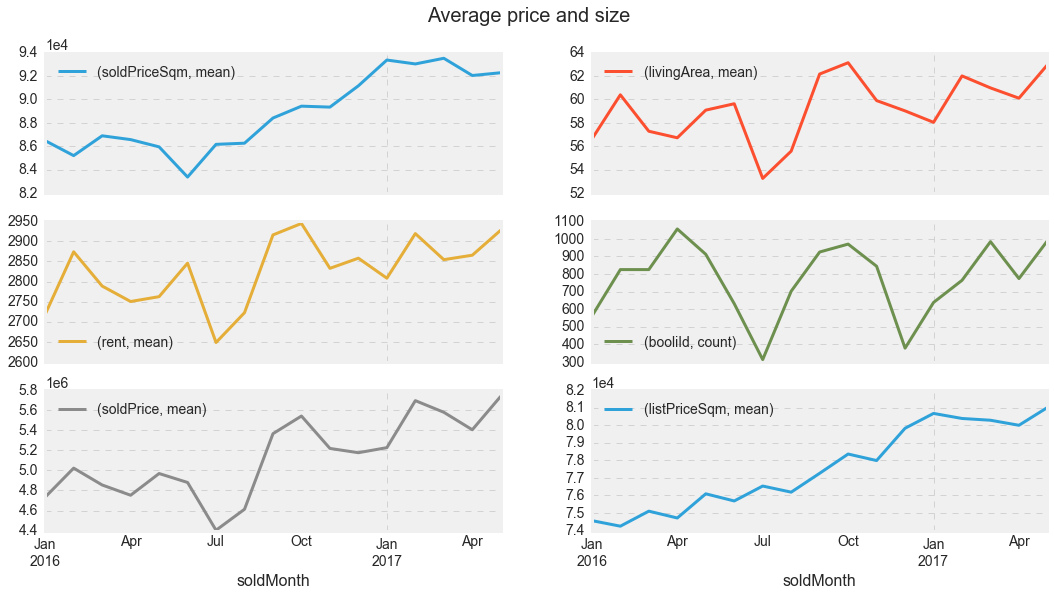

In [7]:
df = df_g
f, ax = plt.subplots(3,2,sharex = True)
agg = {'soldPrice':{'mean':'mean'},
       'soldPriceSqm':{'mean':'mean'},
       'listPriceSqm':{'mean':'mean'},
       'livingArea':{'mean':'mean'},
       'booliId':{'count':'count'},
       'rent':{'mean':'mean'}}
df[(df['soldDate']<'2017-06-01')].groupby('soldMonth').agg(agg).plot(ax=ax, kind='line',title='Average price and size',subplots=True)
plt.show()

In [16]:
df[df['namedAreas']=='Gröndal']

,additionalArea,apartmentNumber,booliId,constructionYear,floor,isNewConstruction,listPrice,livingArea,location,objectType,...,streetAddressNumber,streetAddressName,ocean,coordinates,broker,soldMonth,soldPriceSqm,listPriceSqm,changedPrice,changedPriceSqm
booliId,,,,,,,,,,,,,,,,,,,,,
2310223,0.0,NaN,2310223,1907.0,3.0,0.0,2295000.0,33.0,"{'position': {'longitude': 18.00745019, 'latit...",Lägenhet,...,2,Jungmansgränd,3834.0,"{'longitude': 18.00745019, 'latitude': 59.3156...",Notar,2017-05,77575.757576,69545.454545,265000.0,8030.303030
2230655,0.0,NaN,2230655,1981.0,2.0,0.0,3995000.0,81.0,"{'position': {'longitude': 17.98887849, 'latit...",Lägenhet,...,206,Gröndalsvägen,4864.0,"{'longitude': 17.98887849, 'latitude': 59.3154...",Svenska Mäklarhuset,2017-05,65432.098765,49320.987654,1305000.0,16111.111111
2261449,0.0,NaN,2261449,1957.0,2.0,0.0,2595000.0,58.0,"{'position': {'longitude': 18.0003067, 'latitu...",Lägenhet,...,106,Gröndalsvägen,4241.0,"{'longitude': 18.0003067, 'latitude': 59.31542...",Länsförsäkringar Fastighetsförmedling,2017-05,53448.275862,44741.379310,505000.0,8706.896552
2297612,0.0,NaN,2297612,1957.0,3.0,0.0,5450000.0,99.0,"{'position': {'longitude': 17.99989987, 'latit...",Lägenhet,...,4,Klyvarvägen,4259.0,"{'longitude': 17.99989987, 'latitude': 59.3157...",Fastighetsbyrån,2017-04,62929.292929,55050.505051,780000.0,7878.787879
2262645,0.0,0903,2262645,1946.0,-1.0,0.0,5750000.0,85.0,"{'position': {'longitude': 18.00750083, 'latit...",Lägenhet,...,66,Sjöbjörnsvägen,3763.0,"{'longitude': 18.00750083, 'latitude': 59.3180...",Historiska Hem AB,2017-04,86470.588235,67647.058824,1600000.0,18823.529412
2294545,0.0,1206,2294545,1982.0,2.0,0.0,8500000.0,125.0,"{'position': {'longitude': 18.0085766, 'isAppr...",Lägenhet,...,12,Ormbergsvägen,3720.0,"{'longitude': 18.0085766, 'isApproximate': Tru...",Södermäklarna,2017-04,68000.000000,68000.000000,0.0,0.000000
2288221,0.0,NaN,2288221,NaN,1.0,0.0,2995000.0,67.0,"{'position': {'longitude': 18.00042272, 'latit...",Lägenhet,...,8,Klyvarvägen,4228.0,"{'longitude': 18.00042272, 'latitude': 59.3157...",Svenska Mäklarhuset,2017-04,53731.343284,44701.492537,605000.0,9029.850746
2288647,0.0,NaN,2288647,1958.0,2.0,0.0,3950000.0,74.0,"{'position': {'longitude': 18.0117539, 'isAppr...",Lägenhet,...,21,Grenljusbacken,3641.0,"{'longitude': 18.0117539, 'isApproximate': Tru...",Historiska Hem AB,2017-04,68378.378378,53378.378378,1110000.0,15000.000000
2283824,0.0,NaN,2283824,1934.0,2.0,0.0,3700000.0,63.0,"{'position': {'longitude': 18.0137185, 'isAppr...",Lägenhet,...,3,Lustigkullavägen,3477.0,"{'longitude': 18.0137185, 'isApproximate': Tru...",Historiska Hem AB,2017-04,63650.793651,58730.158730,310000.0,4920.634921


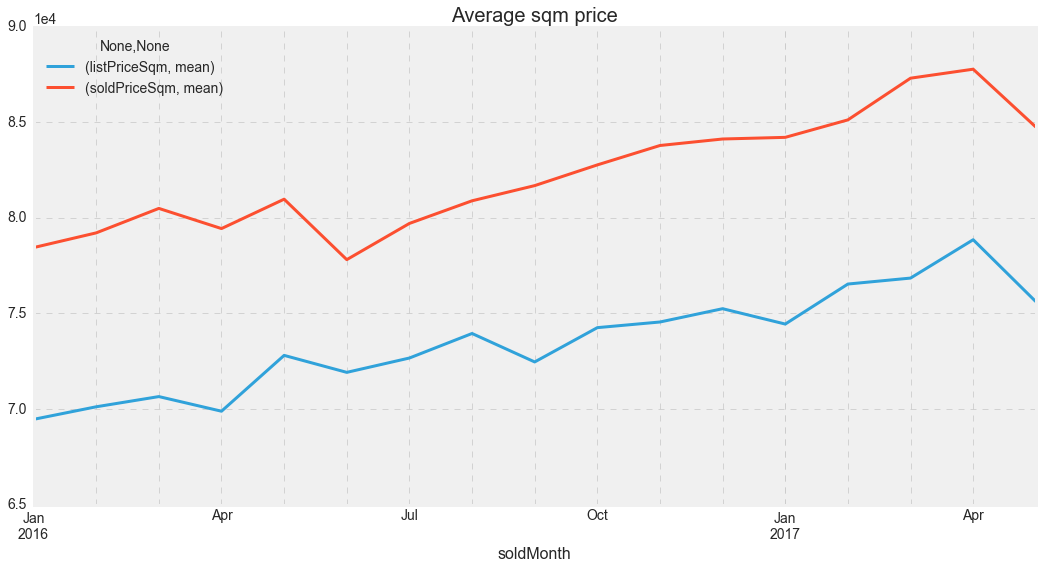

In [8]:
f, ax = plt.subplots(1,1)
agg = {'soldPriceSqm':{'mean':'mean'},'listPriceSqm':{'mean':'mean'}}
df[(df['soldDate']<'2017-06-01') & (df['livingArea']<70) & (df['livingArea']>50)].groupby('soldMonth').agg(agg).plot(ax=ax, kind='line',title='Average sqm price',subplots=False)
ax.grid('on', which='minor', axis='x' )
plt.show()

## 2.2 Construction Year distribution

In [4]:
binyears = 10
df['constructionYear'].plot(kind = 'hist',
                            bins = int((constructionYearRange[1]-constructionYearRange[0])/binyears),
                            xlim = constructionYearRange,
                            xticks=np.arange(constructionYearRange[0],constructionYearRange[1],binyears),
                            rot = 90,
                            title = 'construction year')
plt.show()

NameError: name 'df' is not defined

## 2.3. Area & Broker information
Which areas are the most expensive? Or which broker have the biggest difference between list price and sold price?

In [ ]:
# Start with city_district
f,ax = plt.subplots(1,2)
sns.boxplot(x = 'city_district',y='soldPriceSqm',data = df,ax = ax[0])
plt.xticks(rotation=90)
sns.boxplot(x = 'suburb',y='soldPriceSqm',data = df,ax = ax[1])
#ax.set_title('city_district boxplot')
plt.sca(ax[0])
plt.xticks(rotation=90)
plt.sca(ax[1])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Reaggregate
namedAreas = df.groupby('namedAreas').agg(agg)
# Plot what we got, only areas with more than 10 objects
namedAreas = namedAreas[namedAreas.loc[:,('namedAreas','count')]>10].sort_values(by=('soldPriceSqm','mean'), ascending = False)
df_area = df[df['namedAreas'].isin(namedAreas.index.values)]
sns.boxplot(x = 'namedAreas',y='soldPriceSqm',data = df_area)
xt = plt.xticks(rotation=90)

In [ ]:
agg = {'broker':{'count':'count'},
       'soldPriceSqm':{'mean':'mean'},
       'soldPrice':{'mean':'mean'},
       'listPrice':{'mean':'mean'},
       'changedPrice':{'mean':'mean'},
       'changedPriceSqm':{'mean':'mean'}}
broker = df.groupby('broker').agg(agg)

In [ ]:
#Look only at larger brokers
broker = broker[broker.loc[:,('broker','count')]>10]
df_broker = df[df.loc[:,'broker'].isin(broker.index.values)]
broker = df_broker.groupby('broker').agg(agg)

In [ ]:
#Look only at larger brokers
broker = broker[broker.loc[:,('broker','count')]>10]
df_broker = df[df.loc[:,'broker'].isin(broker.index.values)]
broker = df_broker.groupby('broker').agg(agg)

In [ ]:
sns.boxplot(x = 'broker',y='soldPriceSqm',data = df_broker)
plt.xticks(rotation=90)
plt.title('Broker sqm-price')
plt.show()

In [ ]:
sns.boxplot(x = 'broker',y='soldPriceSqm',data = df_broker)
plt.xticks(rotation=90)
plt.title('Broker sqm-price')
plt.show()

The sold price per square meter had a dip in June, but the brokers listed price did not change from the month before leading to a big drop in the difference between the sold price and listed price (orange line above).

In [ ]:
#Check the broker distribution
f, ax = plt.subplots(1, 1)
(
    broker[('changedPrice','mean')].
    sort_values(ascending=False).
    plot(kind='bar',ax=ax,title='Average changedPrice')
)
plt.show()

In [ ]:
# 3. Correlation

# Look at distribution
df[['soldPrice','soldPriceSqm','rent','ocean']].hist(bins=100)
plt.show()

# log1p: log(h+1). This ensures that zero values are kept as zero values since log(0) is not defined. 
prices = pd.DataFrame({"price":df["soldPrice"], "log(price + 1)":np.log1p(df["soldPrice"])})
prices.hist(bins=100)
plt.show()

## 3.1 Numerical variables, correlation

### Take a look at the data

f, ax = plt.subplots(3, 2)
print(df.columns)
df.plot(kind='scatter',x='listPrice',y='soldPrice',ax = ax[0,0],title='listPrice')
df.plot(kind='scatter',x='livingArea',y='soldPrice',ax = ax[1,0],title='livingArea')
df.plot(kind='scatter',x='rent',y='soldPrice',ax = ax[2,0],title='rent')
df.plot(kind='scatter',x='soldPriceSqm',y='soldPrice',ax = ax[0,1],title='soldDate')
df.plot(kind='scatter',x='ocean',y='soldPrice',ax = ax[1,1],title='ocean')

plt.figure(1)
f, ax = plt.subplots(4, 2)
price = df['soldPrice'].values
ax[0, 0].scatter(df.listPrice.values, price)
ax[0, 0].set_title('listPrice')
ax[0, 1].scatter(df.livingArea.values, price)
ax[0, 1].set_title('livingArea')
ax[1, 0].scatter(df.ocean.values, price)
ax[1, 0].set_title('ocean')
ax[1, 1].scatter(df['constructionYear'].values, price)
ax[1, 1].set_title('constructionYear')
ax[2, 0].scatter(df.floor.values, price)
ax[2, 0].set_title('floor')
ax[2, 1].scatter(df.rent.values, price)
ax[2, 1].set_title('rent')
ax[3, 0].scatter(df.rooms.values, price)
ax[3, 0].set_title('rooms')
ax[3, 1].scatter(df.ocean.values, price)
ax[3, 1].set_title('ocean')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

### Correlation heatmap

corr = df.ix[:, ~df.columns.isin(['booliId','isNewConstruction'])].select_dtypes(include = ['float64', 'int64']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, vmax=1, square=True)

print('Numerical variables Correlation\n')
print(corr['soldPriceSqm'].sort_values(ascending = False))
print('--------------------')
print(corr['soldPrice'].sort_values(ascending = False))

#Select features to check for skewness
from scipy.stats import skew
#numeric_feats = df.select_dtypes(include = ['float64', 'int64']).index
numeric_feats = df.dtypes[df.dtypes == "float64"].index
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
print(skewed_feats)
dd = np.log1p(df[skewed_feats])
dd.hist()